# Data summarization

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import norm, pearsonr, spearmanr
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
font = { 'family': 'DejaVu Sans', 'weight': 'bold', 'size': 15 }
plt.rc('font', **font)

In [3]:
df = pd.read_csv('../data/data.csv', low_memory=False)

In [4]:
df.head()

,IDIROID,YEAR,YR_NUM,TOTAL_YEARS,EARLY_TRANSFER,EARLY_CANX_LEFT,EARLY_CANX_DEFER,FEB_CANX_LEFT,FEB_CANX_DEFER,DAYS_TO_FIRST_REG,...,NUM_MAY_TYPE_C,NUM_MAY_TYPE_D,NUM_MAY_TYPE_E,NUM_MAY_TYPE_X,NUM_MAY_TYPE_S,EARLIEST_CRM_DATE,DAYS_TO_FIRST_CRM,PREV_NUM_CRM,Precision`Mark,Overal`Mark
0,239,2014,1,1,N,N,N,N,N,16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.40,71.0
1,243,2014,1,1,N,N,N,N,N,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68.00,68.0
2,2408,2014,1,1,N,N,N,N,N,9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57.96,58.0
3,2414,2014,1,1,N,N,N,N,N,16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.58,64.0
4,2415,2014,1,1,N,N,N,N,N,9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.46,62.0


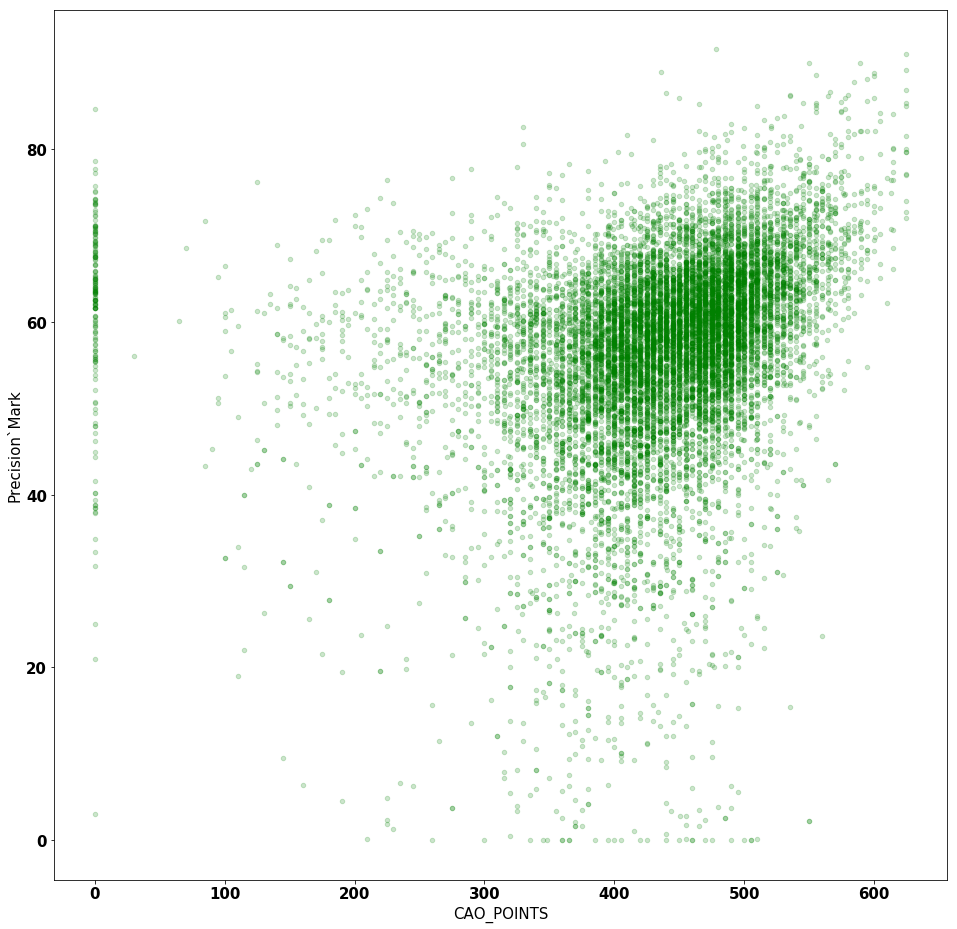

In [5]:
fig = df.plot.scatter(
    x='CAO_POINTS', 
    y='Precision`Mark', 
    c='green',
    alpha=0.2,
    figsize=(16, 16)
)

In [6]:
faculties = [
    'HUMANITIES AND SOCIAL SCIENCES',
    'SCIENCE AND HEALTH',
    'DCUBS/HSS',
    'DCU BUSINESS SCHOOL',
    'ENGINEERING AND COMPUTING',
    'INSTITUTE OF EDUCATION',
]

In [7]:
color_dict = {
        'HUMANITIES AND SOCIAL SCIENCES': 'brown',
        'SCIENCE AND HEALTH': 'purple',
        'DCUBS/HSS': 'red',
        'DCU BUSINESS SCHOOL': 'green',
        'ENGINEERING AND COMPUTING': 'orange',
        'INSTITUTE OF EDUCATION': 'blue',
    }

In [8]:
COLOR_COL = df['FACULTY'].map(
    color_dict
)

In [9]:
from matplotlib.lines import Line2D

legend_elements = []
for faculty, color in color_dict.items():
    legend_elements.append(
        Line2D([0], [0], marker='o', color='w', label=faculty, markerfacecolor=color, markersize=15)
    )

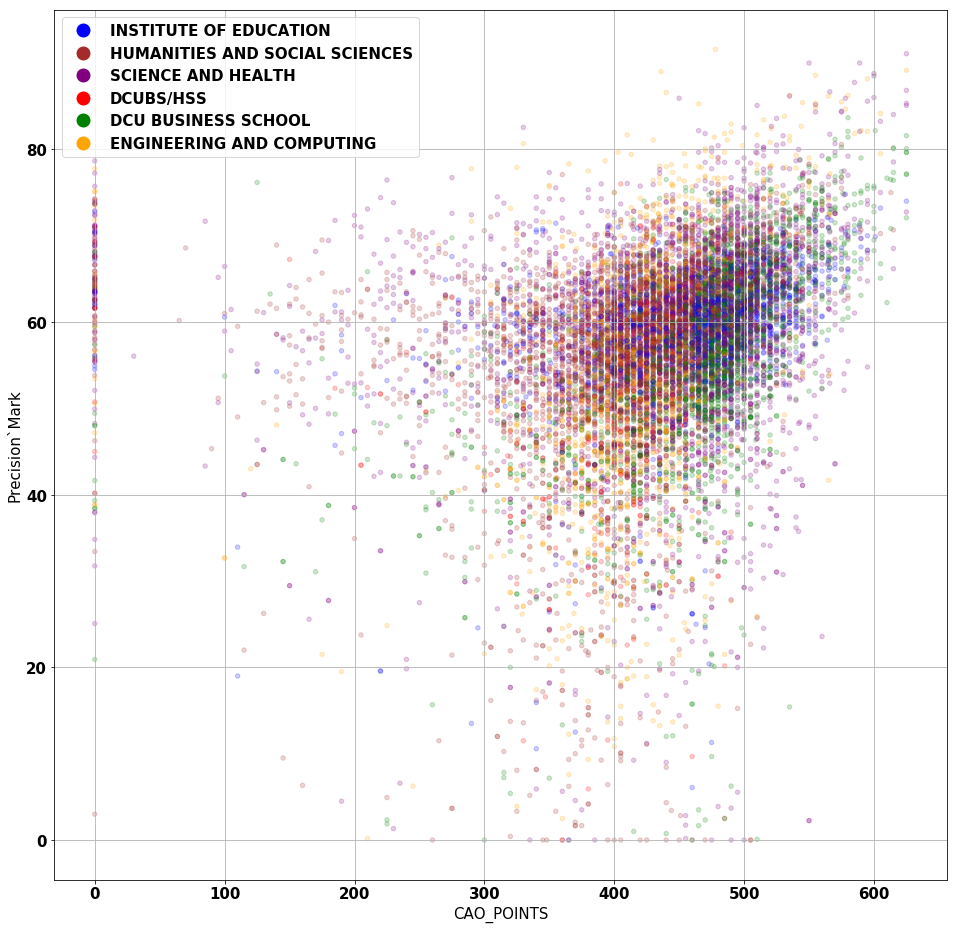

In [10]:
fig, ax = plt.subplots()
df.plot.scatter(
    x='CAO_POINTS', 
    y='Precision`Mark', 
    c=COLOR_COL, 
    alpha=0.2,
    figsize=(16, 16),
    ax=ax,
)
plt.grid()
ax.legend(handles=legend_elements, loc='upper left')
plt.savefig('../figures/scatter_CAO_POINTS_PRECISION_MARK_by_FACULTY_with_Legend.png', bbox_inches="tight")

### Faculty of Computing & Engineering

In [11]:
_eng_faculty = 'ENGINEERING AND COMPUTING'

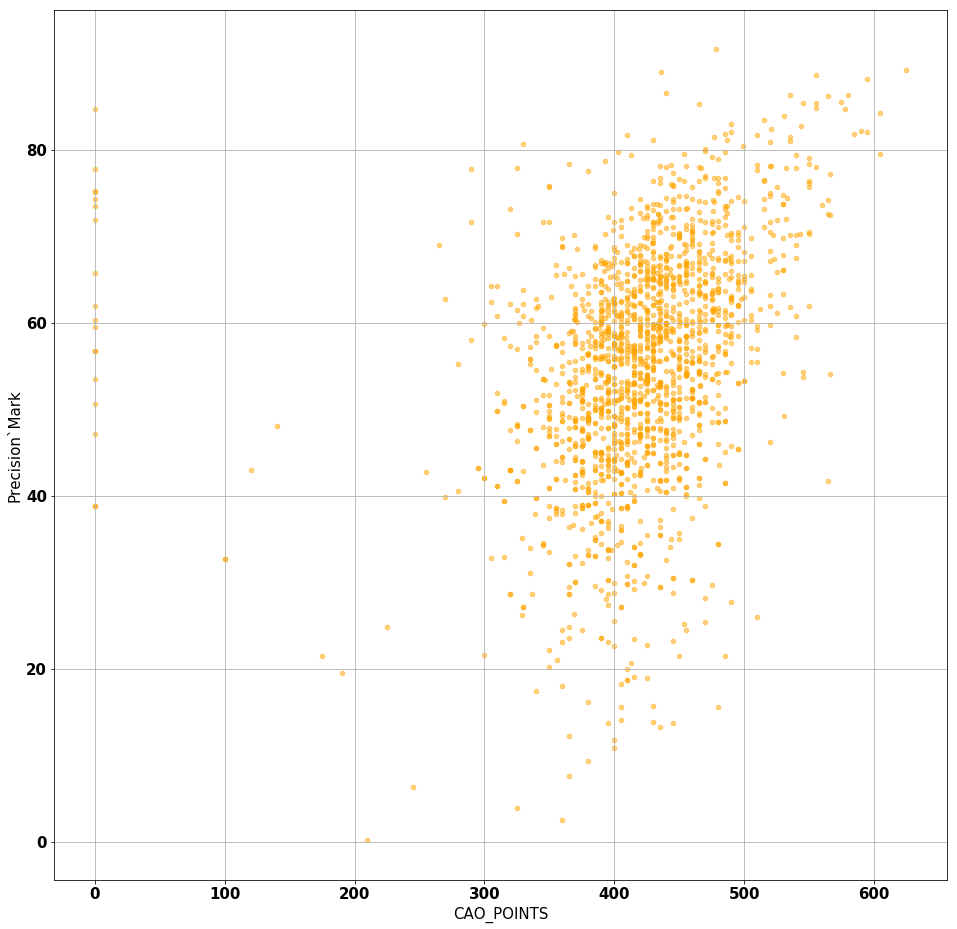

In [12]:
fig, ax = plt.subplots()
df[df['FACULTY'] == _eng_faculty].plot.scatter(
    x='CAO_POINTS', 
    y='Precision`Mark', 
    c=color_dict[_eng_faculty], 
    alpha=0.5,
    figsize=(16, 16),
    ax=ax,
)
plt.grid()
plt.savefig('../figures/scatter_CAO_POINTS_PRECISION_MARK_END_with_Grid.png', bbox_inches="tight")

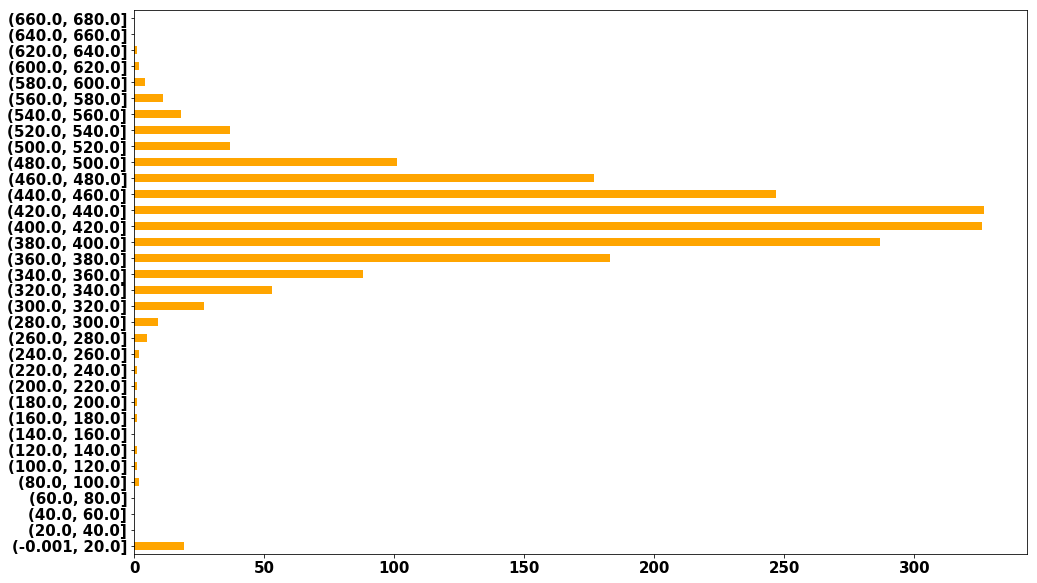

In [13]:
fig = pd.cut(df[df['FACULTY'] == _eng_faculty]['CAO_POINTS'], 
             bins=range(0, 700, 20), include_lowest=True).value_counts(sort=False).plot.barh(
    rot=0, color=color_dict[_eng_faculty], figsize=(16, 10))

In [14]:
fig.get_figure().savefig('../figures/Histogram_Faculty_ENG_CAO_POINTS.png', bbox_inches="tight")

In [15]:
'{:,}'.format(len(df[df['FACULTY'] == _eng_faculty]))

'2,083'

In [16]:
CAO_LOWER_BOUND = 300
CAO_HIGHER_BOUND = 500
MARK_LOWER_BOUND = 40
MARK_HIGER_BOUND = 80

for faculty in faculties:

    _fac_box_indices = df[(df['FACULTY'] == faculty) &
                          (df['CAO_POINTS'] >= CAO_LOWER_BOUND) &
                          (df['CAO_POINTS'] <= CAO_HIGHER_BOUND) &
                          (df['Precision`Mark'] >= MARK_LOWER_BOUND) &
                          (df['Precision`Mark'] <= MARK_HIGER_BOUND)].index

    _faculty_indices = df[(df['FACULTY'] == faculty)]

    print('Faculty: {}, Box: {:.2f}'.format(faculty, float(len(_fac_box_indices)) / len(_faculty_indices)))

Faculty: HUMANITIES AND SOCIAL SCIENCES, Box: 0.69
Faculty: SCIENCE AND HEALTH, Box: 0.56
Faculty: DCUBS/HSS, Box: 0.73
Faculty: DCU BUSINESS SCHOOL, Box: 0.51
Faculty: ENGINEERING AND COMPUTING, Box: 0.72
Faculty: INSTITUTE OF EDUCATION, Box: 0.70


**Measures of centrality**:
* Mean
* Median
* mode

**Measures of variation**:
* Variance, standard deviation
* Range and Interquartile range

In [17]:
df[['CAO_POINTS', 'LC_MATHS_POINTS', 'Precision`Mark']].describe()

,CAO_POINTS,LC_MATHS_POINTS,Precision`Mark
count,15224.000000,15275.000000,15629.000000
mean,430.778836,49.116596,56.966918
std,86.079601,20.395457,11.681384
min,0.000000,0.000000,0.000000
25%,400.000000,35.000000,52.180000
50%,445.000000,46.000000,58.700000
75%,485.000000,65.000000,64.000000
max,625.000000,100.000000,92.750000


In [18]:
df.groupby('FACULTY')['CAO_POINTS'].describe()

,count,mean,std,min,25%,50%,75%,max
FACULTY,,,,,,,,
DCU BUSINESS SCHOOL,2963.0,461.555181,73.903252,0.0,440.0,475.0,499.0,625.0
DCUBS/HSS,541.0,409.012939,71.648511,0.0,395.0,415.0,445.0,550.0
ENGINEERING AND COMPUTING,1969.0,417.979177,66.983177,0.0,390.0,420.0,454.0,625.0
HUMANITIES AND SOCIAL SCIENCES,4185.0,402.272879,85.175320,0.0,375.0,415.0,450.0,615.0
INSTITUTE OF EDUCATION,1902.0,448.847003,78.319751,0.0,420.0,467.0,490.0,625.0
SCIENCE AND HEALTH,3664.0,439.162937,98.221701,0.0,405.0,460.0,500.0,625.0


In [19]:
df.groupby('FACULTY')['CAO_POINTS'].median()

FACULTY
DCU BUSINESS SCHOOL               475.0
DCUBS/HSS                         415.0
ENGINEERING AND COMPUTING         420.0
HUMANITIES AND SOCIAL SCIENCES    415.0
INSTITUTE OF EDUCATION            467.0
SCIENCE AND HEALTH                460.0
Name: CAO_POINTS, dtype: float64

In [20]:
df.groupby('FACULTY')['LC_MATHS_POINTS'].describe()

,count,mean,std,min,25%,50%,75%,max
FACULTY,,,,,,,,
DCU BUSINESS SCHOOL,2968.0,55.837264,17.959288,0.0,45.0,56.0,70.0,100.0
DCUBS/HSS,542.0,42.734317,15.832869,0.0,30.0,40.0,55.0,88.0
ENGINEERING AND COMPUTING,1976.0,58.940789,16.734442,0.0,46.0,60.0,70.0,100.0
HUMANITIES AND SOCIAL SCIENCES,4210.0,37.609026,17.352333,0.0,25.0,37.0,46.0,90.0
INSTITUTE OF EDUCATION,1907.0,45.894074,17.951237,0.0,35.0,45.0,60.0,100.0
SCIENCE AND HEALTH,3672.0,54.206972,22.186898,0.0,40.0,55.0,70.0,100.0


In [21]:
df.groupby('FACULTY')['LC_MATHS_POINTS'].median()

FACULTY
DCU BUSINESS SCHOOL               56.0
DCUBS/HSS                         40.0
ENGINEERING AND COMPUTING         60.0
HUMANITIES AND SOCIAL SCIENCES    37.0
INSTITUTE OF EDUCATION            45.0
SCIENCE AND HEALTH                55.0
Name: LC_MATHS_POINTS, dtype: float64

In [22]:
df.groupby('FACULTY')['Precision`Mark'].describe()

,count,mean,std,min,25%,50%,75%,max
FACULTY,,,,,,,,
DCU BUSINESS SCHOOL,3600.0,57.107578,11.876452,0.0,51.25,58.080,64.69,90.22
DCUBS/HSS,501.0,52.780579,11.192031,0.0,47.25,54.830,60.08,76.00
ENGINEERING AND COMPUTING,1955.0,55.118813,13.688004,0.0,47.33,56.080,64.29,92.75
HUMANITIES AND SOCIAL SCIENCES,4077.0,55.890787,11.504899,0.0,52.92,58.420,62.58,80.92
INSTITUTE OF EDUCATION,1830.0,58.810842,7.104217,0.0,56.20,59.600,62.67,74.80
SCIENCE AND HEALTH,3666.0,58.662780,11.994822,0.0,52.88,60.385,66.64,91.08


In [23]:
df.groupby('FACULTY')['Precision`Mark'].median()

FACULTY
DCU BUSINESS SCHOOL               58.080
DCUBS/HSS                         54.830
ENGINEERING AND COMPUTING         56.080
HUMANITIES AND SOCIAL SCIENCES    58.420
INSTITUTE OF EDUCATION            59.600
SCIENCE AND HEALTH                60.385
Name: Precision`Mark, dtype: float64

In [24]:
df.groupby('FACULTY')['NUM_SUBJECTS'].describe()

,count,mean,std,min,25%,50%,75%,max
FACULTY,,,,,,,,
DCU BUSINESS SCHOOL,3788.0,10.578141,2.395526,1.0,10.0,11.0,12.0,15.0
DCUBS/HSS,550.0,9.869091,2.559519,1.0,10.0,11.0,11.0,11.0
ENGINEERING AND COMPUTING,2083.0,8.925108,2.747833,1.0,9.0,10.0,10.0,12.0
HUMANITIES AND SOCIAL SCIENCES,4470.0,9.453468,2.087900,1.0,8.0,9.0,10.0,23.0
INSTITUTE OF EDUCATION,1949.0,12.608517,2.003885,1.0,12.0,13.0,14.0,20.0
SCIENCE AND HEALTH,3956.0,10.419110,2.262379,1.0,11.0,11.0,11.0,21.0


In [25]:
df.groupby('FACULTY')['NUM_SUBJECTS'].median()

FACULTY
DCU BUSINESS SCHOOL               11.0
DCUBS/HSS                         11.0
ENGINEERING AND COMPUTING         10.0
HUMANITIES AND SOCIAL SCIENCES     9.0
INSTITUTE OF EDUCATION            13.0
SCIENCE AND HEALTH                11.0
Name: NUM_SUBJECTS, dtype: float64

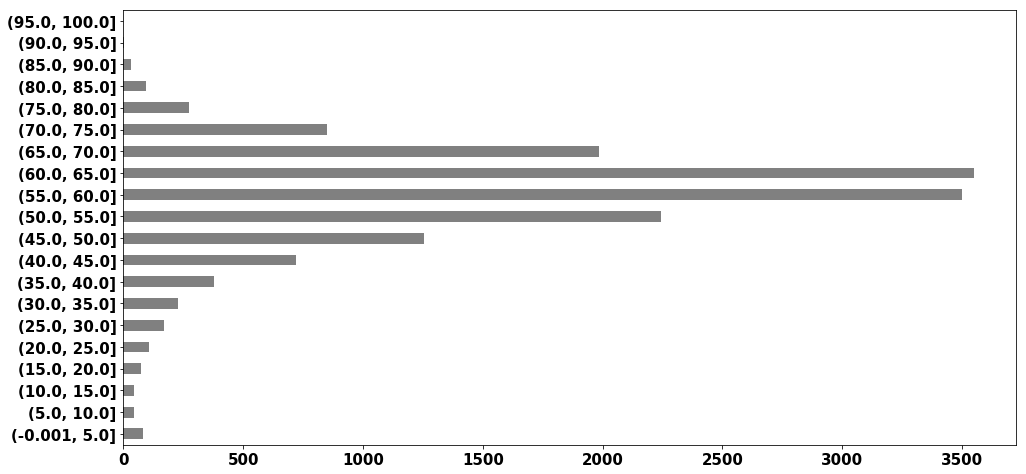

In [26]:
fig = pd.cut(df['Precision`Mark'], bins=range(0, 105, 5), include_lowest=True).value_counts(sort=False).plot.barh(
    rot=0, color='grey', figsize=(16, 8))

In [27]:
fig.get_figure().savefig('../figures/Histogram_Precision_Mark.png', bbox_inches="tight")

In [28]:
# https://stackoverflow.com/questions/20011122/fitting-a-normal-distribution-to-1d-data
def fit_normal_distrib(data, parameter, filename='', color='g'):

    # Fit a normal distribution to the data:
    mu, std = norm.fit(data)
    
    fig, ax = plt.subplots(figsize=(15, 8))

    # Plot the histogram.
    plt.hist(data, bins=30, density=True, alpha=0.6, color=color)

    # Plot the PDF (Probability density function)
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    plt.plot(x, p, 'k', linewidth=2)
    title = "{} - Fit results: mu = {:.2f},  std = {:.2f}".format(parameter, mu, std)
    plt.title(title)
    if filename != '': plt.savefig(filename, bbox_inches="tight")

    plt.show()

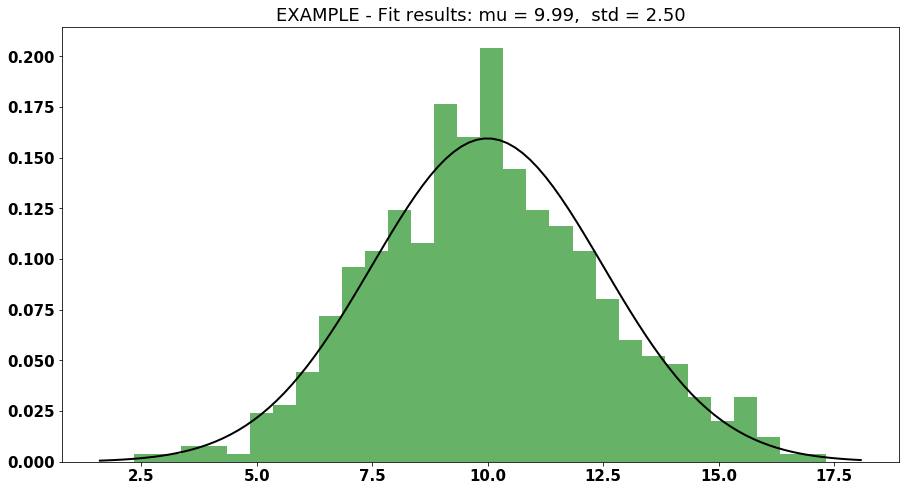

In [29]:
example_data = norm.rvs(10.0, 2.5, size=500)
fit_normal_distrib(example_data, 'EXAMPLE')

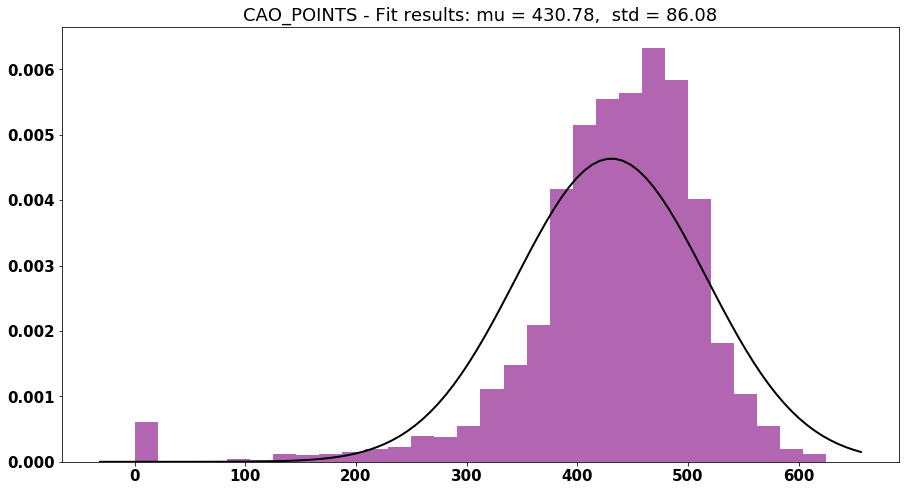

In [30]:
cao_grades = np.array(
    df[df['CAO_POINTS'].notnull()]['CAO_POINTS']
)
fit_normal_distrib(cao_grades, 'CAO_POINTS', '../figures/Fitting_PDF_to_CAO_POINTS.png', color='purple')

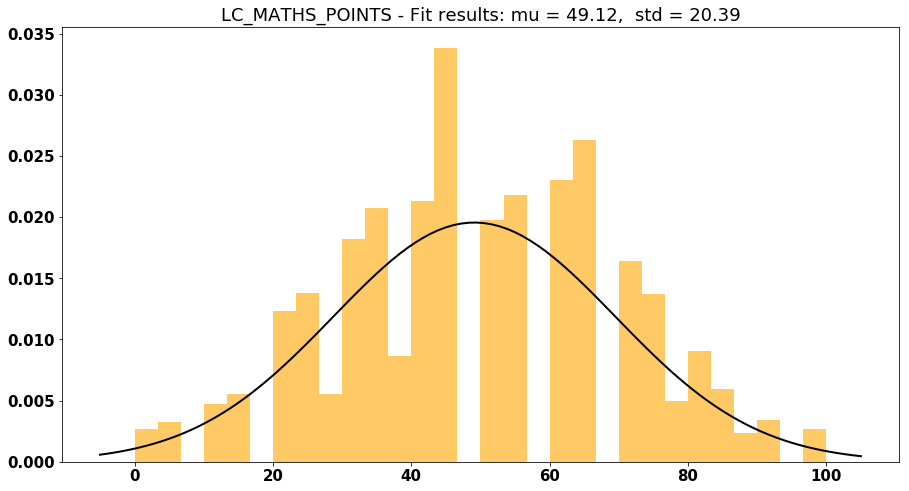

In [31]:
math_grades = np.array(
    df[df['LC_MATHS_POINTS'].notnull()]['LC_MATHS_POINTS']
)
fit_normal_distrib(math_grades, 'LC_MATHS_POINTS', '../figures/Fitting_PDF_to_LC_MATHS_POINTS.png', color='orange')

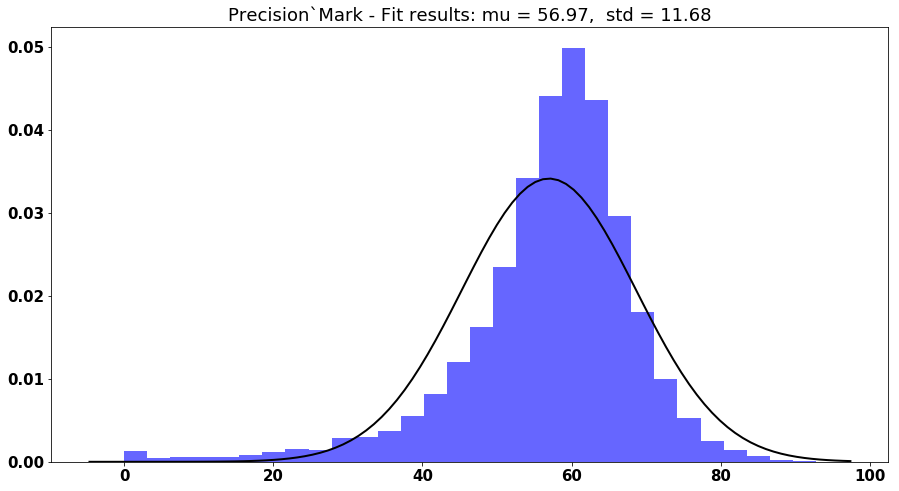

In [32]:
marks = np.array(df[df['Precision`Mark'].notnull()]['Precision`Mark'])
fit_normal_distrib(marks, 'Precision`Mark', '../figures/Fitting_PDF_to_Precision_Mark.png', color='b')